<a href="https://colab.research.google.com/github/vaibhaviitkgp/Assignment-2/blob/main/21BT10002_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Uploading the data

In [ ]:
!unzip FNA.zip

function to uploading images

In [15]:
import os
import cv2
import numpy as np

def load_images(data_path):
    images = []
    labels = []

    class_labels = {'benign': 0, 'malignant': 1}

    for class_name, label in class_labels.items():
        class_path = os.path.join(data_path, class_name)
        for filename in os.listdir(class_path):
            if filename.endswith(".png"):
                file_path = os.path.join(class_path, filename)
                img = cv2.imread(file_path)
                img = cv2.resize(img, (224, 224))
                images.append(img)
                labels.append(label)

    return np.array(images), np.array(labels)
X, y = load_images('FNA')

necessary libraries

In [16]:
!pip install tensorflow
!pip install tensorflow.keras

ERROR: Could not find a version that satisfies the requirement tensorflow.keras (from versions: none)
ERROR: No matching distribution found for tensorflow.keras


Test-train split

In [17]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

train_generator = datagen.flow(X_train, y_train, batch_size=32)
val_generator = datagen.flow(X_val, y_val, batch_size=32)

Model building and training

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

img_height, img_width = 224, 224

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, epochs=5, validation_data=val_generator)

Epoch 1/5
44/44 [==============================] - 115s 3s/step - loss: 6.1628 - accuracy: 0.6940 - val_loss: 0.3961 - val_accuracy: 0.8696
Epoch 2/5
44/44 [==============================] - 107s 2s/step - loss: 0.3896 - accuracy: 0.8644 - val_loss: 0.3954 - val_accuracy: 0.8377
Epoch 3/5
44/44 [==============================] - 107s 2s/step - loss: 0.3491 - accuracy: 0.8695 - val_loss: 0.3421 - val_accuracy: 0.8725
Epoch 4/5
44/44 [==============================] - 107s 2s/step - loss: 0.3248 - accuracy: 0.8782 - val_loss: 0.3269 - val_accuracy: 0.8870
Epoch 5/5
44/44 [==============================] - 114s 3s/step - loss: 0.3068 - accuracy: 0.8876 - val_loss: 0.3968 - val_accuracy: 0.8377


Visualization of accuracy and loss

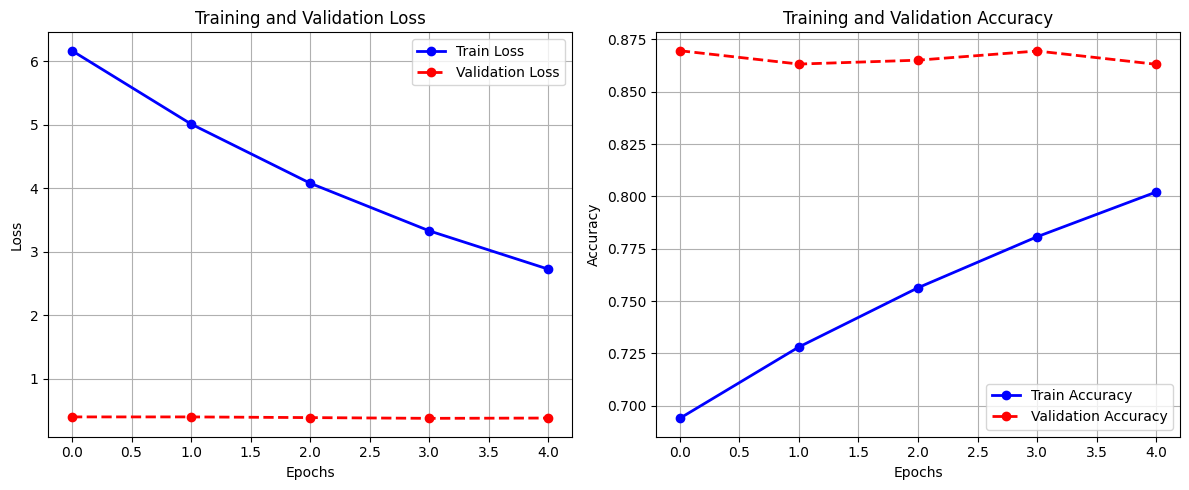

In [19]:
import matplotlib.pyplot as plt
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))


ax1.plot(smooth_curve(history.history['loss']), 'bo-', label='Train Loss', linewidth=2)
ax1.plot(smooth_curve(history.history['val_loss']), 'ro--', label='Validation Loss', linewidth=2)
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True)


ax2.plot(smooth_curve(history.history['accuracy']), 'bo-', label='Train Accuracy', linewidth=2)
ax2.plot(smooth_curve(history.history['val_accuracy']), 'ro--', label='Validation Accuracy', linewidth=2)
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


Upload test data

In [21]:
!unzip test.zip

Archive:  test.zip
replace test/eight.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [22]:
def convert_probabilities_to_labels(pred):
    threshold = 0.5
    labels = []

    for probability in pred:
        if probability[0] > threshold:
            labels.append('Benign')
        else:
            labels.append('Malignant')
    return labels

Prediction results on test data

In [23]:
def load_test_img(folder_path):
    images = []
    image_names = []

    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        if img_path.endswith(".png"):
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (224, 224))
            images.append(img)
            image_names.append(filename)

    return np.array(images), image_names


test_img, test_img_names = load_test_img('test')
test_generator = datagen.flow(test_img, batch_size=1, shuffle=False)

pred = model.predict(test_generator)
predicted_labels = convert_probabilities_to_labels(pred)

for i in range(len(test_img_names)):
    print(f"Image: {test_img_names[i]}, Prediction: {predicted_labels[i]}")


12/12 [==============================] - 1s 39ms/step
Image: one.png, Prediction: Malignant
Image: seven.png, Prediction: Benign
Image: four.png, Prediction: Benign
Image: six.png, Prediction: Malignant
Image: eight.png, Prediction: Benign
Image: fourteen.png, Prediction: Benign
Image: eleven.png, Prediction: Benign
Image: twelve.png, Prediction: Benign
Image: three.png, Prediction: Benign
Image: two.png, Prediction: Malignant
Image: nine.png, Prediction: Benign
Image: five.png, Prediction: Benign
